In [2]:
import pandas as pd
import numpy as np

spectra = pd.read_csv('spectra.dat', delimiter=' ', header=None)
spectra.head

<bound method NDFrame.head of           0         1         2         3         4         5         6    \
0    0.010532  0.011854  0.011477  0.011186  0.010723  0.007781  0.003281   
1    0.012206  0.013479  0.013350  0.013068  0.013404  0.011025  0.005107   
2    0.003660  0.004010  0.004001  0.003920  0.004109  0.003515  0.001691   
3    0.065447  0.071665  0.071253  0.069657  0.072569  0.061464  0.029246   
4    0.143073  0.156413  0.155725  0.152241  0.159254  0.135972  0.065265   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.084785  0.092999  0.092949  0.091197  0.095809  0.082226  0.039687   
996  0.014452  0.015888  0.016062  0.015868  0.017012  0.015016  0.007340   
997  0.153889  0.168172  0.167482  0.163732  0.171433  0.146658  0.070557   
998  0.025145  0.027639  0.027524  0.026976  0.028090  0.023713  0.011243   
999  0.046592  0.051136  0.051223  0.050333  0.053077  0.045830  0.022268   

          7         8         9    ...       

In [3]:
wavelengths = pd.read_csv('wavelengths.csv', header=None)
wavelengths.head

<bound method NDFrame.head of              0
0     1995.952
1     2005.169
2     2014.430
3     2023.732
4     2033.078
..         ...
845  97947.983
846  98400.317
847  98854.740
848  99311.262
849  99769.891

[850 rows x 1 columns]>

In [4]:
galaxy_properties = pd.read_csv('galaxy_properties.csv', index_col = 0)
galaxy_properties.head

<bound method NDFrame.head of       dust_av       age      mass    tauGyr
idx                                        
0    0.164869  0.203291  7.885367  0.033035
1    0.200852  0.470248  8.297678  0.087146
2    0.197863  4.033993  8.184615  1.273974
3    0.001000  0.721636  8.360110  0.242588
4    0.001000  0.699464  8.373327  0.510683
..        ...       ...       ...       ...
995  0.322905  2.018232  8.987870  2.069916
996  0.870794  0.075134  7.607796  0.062845
997  0.001000  0.849640  8.415094  0.918643
998  0.232163  0.586724  8.286425  0.168273
999  0.456984  0.612213  8.276157  3.523973

[1000 rows x 4 columns]>

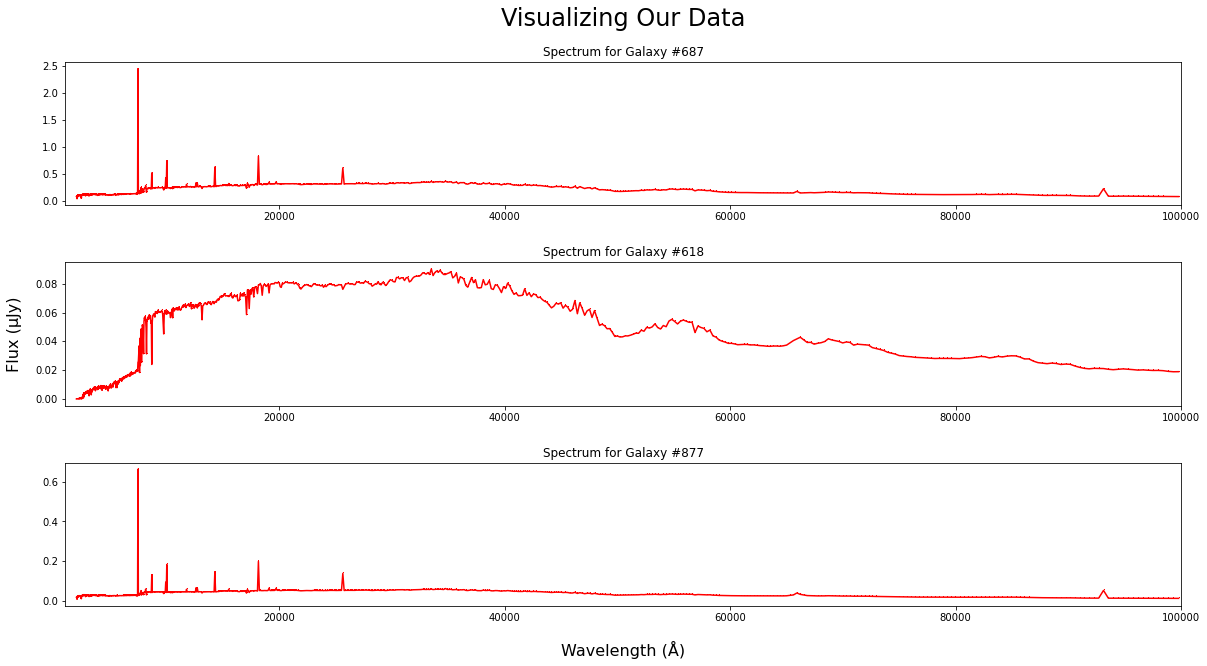

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import random
%matplotlib inline

random.seed(1010) # for reproducibility
rows = [random.randint(0, len(spectra)) for i in range(3)]  # select three random galaxy spectrums to visualize

plt.rcParams["figure.figsize"] = (20,10) #set size of plot

fig = plt.figure()
ax = fig.add_subplot(111) # Generating subplots for our figure; see https://stackoverflow.com/a/6981055/3135556
ax1 = fig.add_subplot(311) # 3 rows, 1 column, plot at position 1
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1.plot(wavelengths, spectra.loc[rows[0]], 'r,-')
ax2.plot(wavelengths, spectra.loc[rows[1]], 'r,-')
ax3.plot(wavelengths, spectra.loc[rows[2]], 'r,-')

ax1.set_xlim(1000, 100000) # restrict the x-axis to mitigate the gap that exists around x=0
ax2.set_xlim(1000, 100000)
ax3.set_xlim(1000, 100000)

# Set common labels
ax.set_xlabel("Wavelength (Å)", fontsize=16, labelpad=18)
ax.set_ylabel("Flux (μJy)", fontsize=16, labelpad=20)
ax.set_title("Visualizing Our Data", fontsize=24, pad=36)

ax1.set_title("Spectrum for Galaxy #" + str(rows[0]))
ax2.set_title("Spectrum for Galaxy #" + str(rows[1]))
ax3.set_title("Spectrum for Galaxy #" + str(rows[2]))

plt.subplots_adjust(hspace=0.4) # increase vertical distance between subplots

## Predicting Age

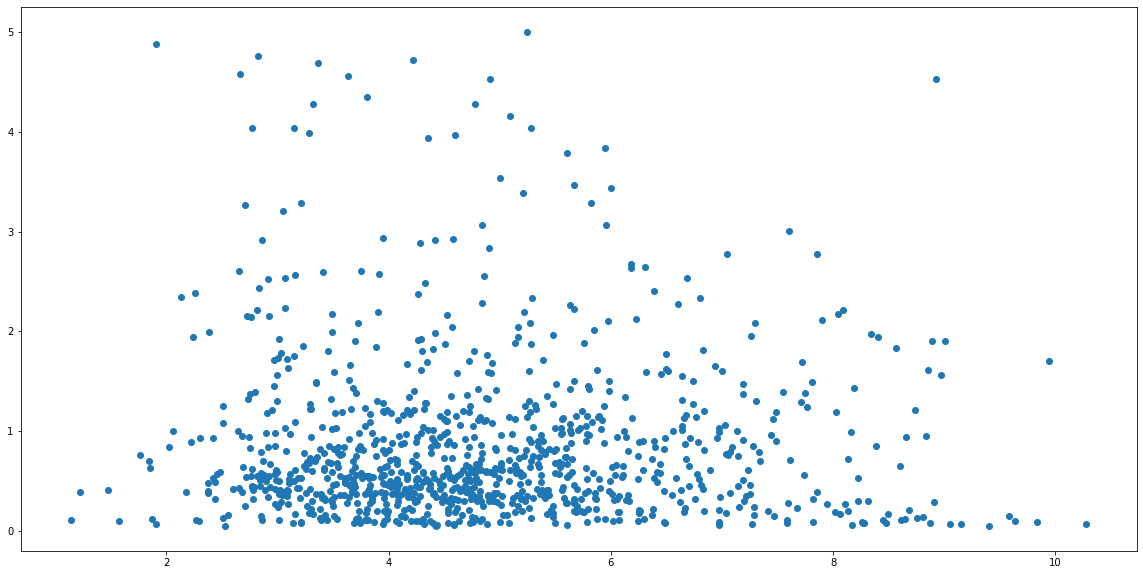

In [6]:
ages = galaxy_properties['age']
ages.head

X = np.empty(len(spectra))
for i in range(len(spectra)):
    X[i] = np.log(np.sum(spectra.loc[i]))

plt.scatter(X, ages)

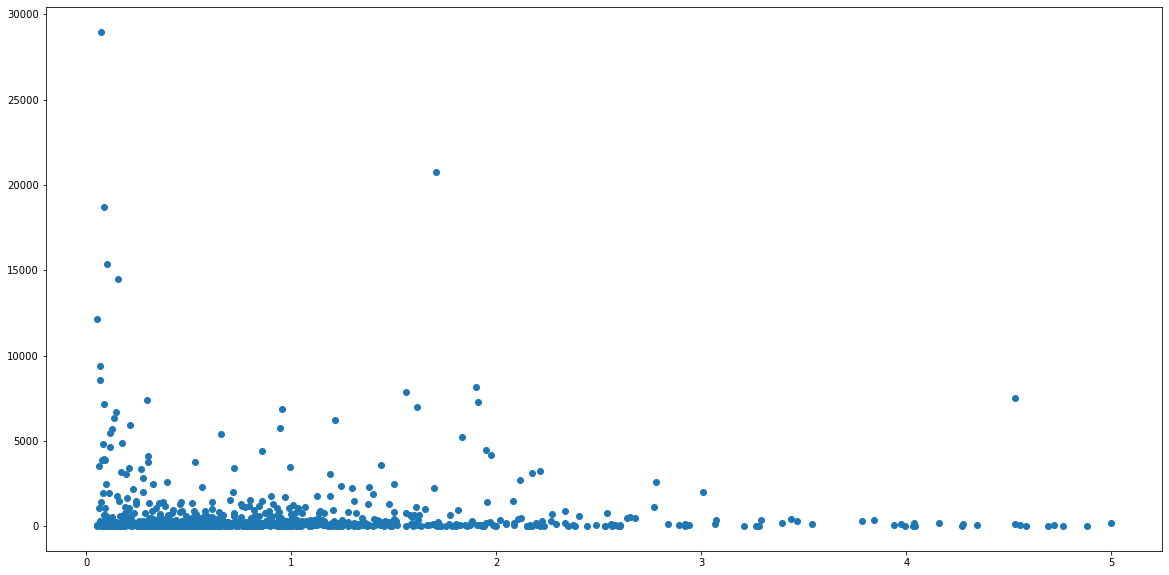

In [6]:
X = np.empty(len(spectra))
for i in range(len(spectra)):
    X[i] = np.sum(spectra.loc[i])

plt.scatter(ages, X)

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV, Ridge, Lasso, LassoCV
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(spectra, ages, random_state=101)

model = Ridge()
model.fit(X_train, y_train)
mean_squared_error(y_test, model.predict(X_test))
type(X_train)

pandas.core.frame.DataFrame

In [8]:
model = Ridge()
cv = KFold(n_splits=5, shuffle=True, random_state=101)
cross_val = cross_validate(model, X_train, y_train, cv = cv, scoring = 'neg_mean_squared_error', return_train_score=True)
cross_val

{'fit_time': array([0.0382092 , 0.03848481, 0.04785705, 0.04572392, 0.03414488]),
 'score_time': array([0.01240015, 0.01447105, 0.02285194, 0.00876784, 0.01204109]),
 'test_score': array([-0.47826229, -0.84259982, -0.56332484, -0.58760169, -0.7931765 ]),
 'train_score': array([-0.65113735, -0.55174288, -0.63313297, -0.60785145, -0.55811991])}

In [9]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
model = Ridge(alpha=1, normalize=True)
model.fit(X_train, y_train)
mean_squared_error(y_test, model.predict(X_test))

0.6664077532432556

In [10]:
model = Ridge()
model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [11]:
model = SVR()
cv = KFold(n_splits=5, shuffle=True, random_state=101)
l_benchmark_lim = cross_validate(model, spectra, ages, cv = cv, scoring = 'neg_mean_squared_error', return_train_score=True)
l_benchmark_lim

model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Data preprocessing

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(spectra)
scaled_spectra = scaler.transform(spectra)

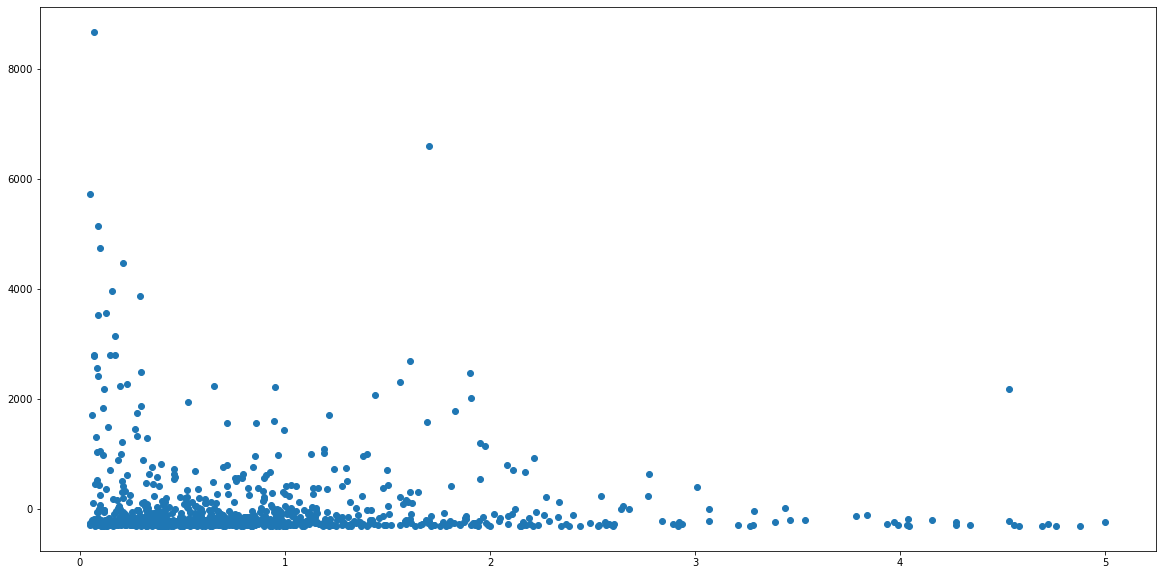

In [13]:
Y = np.empty(len(scaled_spectra))
for i in range(len(scaled_spectra)):
    Y[i] = np.sum(scaled_spectra[i])

plt.scatter(ages, Y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(scaled_spectra, ages, random_state=101)
svr = SVR(verbose=True)
cv = KFold(n_splits=3, shuffle=True, random_state=101)
svr.fit(X_train, y_train)

X_train2, X_test2, y_train2, y_test2 = train_test_split(spectra, ages, random_state=101)
svr2 = SVR(verbose=True)
svr2.fit(X_train2, y_train2)

[LibSVM][LibSVM]

SVR(verbose=True)

In [15]:
print(mean_squared_error(y_test, svr.predict(X_test)))
print(mean_squared_error(y_test2, svr2.predict(X_test2)))

0.6583284599831433
0.6648831303746613


In [16]:
-0.5871 {'C': 10, 'degree': 1, 'kernel': 'rbf'}

SyntaxError: invalid syntax (<ipython-input-16-401983b88833>, line 1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(spectra, ages, random_state=101)
svr = SVR(verbose=True)
cv = KFold(n_splits=5, shuffle=True, random_state=101)
# l_benchmark_lim = cross_validate(model, spectra, ages, cv = cv, scoring = 'neg_mean_squared_error', return_train_score=True)
# l_benchmark_lim

params = {
    'C': [0.01, 0.1, 1.0, 1, 10],
    'degree': [1, 3, 5, 7],
    'kernel': ['poly', 'rbf'],
}

model = GridSearchCV(svr, params, cv = cv, verbose=5, n_jobs=-4, return_train_score=True, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-4)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=-4)]: Done   8 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-4)]: Done  62 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-4)]: Done 152 tasks      | elapsed:   60.0s
[Parallel(n_jobs=-4)]: Done 200 out of 200 | elapsed:  1.5min finished


[LibSVM]Best params, best score: -0.6193 {'C': 10, 'degree': 1, 'kernel': 'rbf'}


In [35]:
params = {
    'C': [1, 10, 50, 100, 100, 500, 1000],
    'kernel': ['rbf'],
    'gamma': ['auto', 'scale', 0.1, 1.0, 10.0, 100.0]
}

model = GridSearchCV(svr, params, cv = cv, verbose=5, n_jobs=-4, return_train_score=True, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)

NameError: name 'GridSearchCV' is not defined

In [ ]:
params = {
    'C': [1, 10, 50, 100, 100, 500, 1000],
    'kernel': ['rbf'],
    'gamma': ['auto', 'scale', 0.1, 1.0, 10.0, 100.0]
}

model = GridSearchCV(svr, params, cv = cv, verbose=5, n_jobs=-3, return_train_score=True, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)

In [ ]:
params = {
    'C': [100, 200, 300, 400, 500, 600, 700, 800, 1000],
    'kernel': ['rbf'],
    'gamma': [0.1, 0.5, 1.0, 1.5, 2.0, 5.0, 10.0]
}

model = GridSearchCV(svr, params, cv = cv, verbose=5, n_jobs=-3, return_train_score=True, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)

In [ ]:
params = {
    'C': [600, 700, 800, 900, 1000, 1100, 1200],
    'kernel': ['rbf'],
    'gamma': [0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 1.0]
}

model = GridSearchCV(svr, params, cv = cv, verbose=5, n_jobs=-3, return_train_score=True, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)

In [ ]:
params = {
    'C': [1000, 1100, 1200, 1250, 1300, 1350, 1400, 1600],
    'kernel': ['rbf'],
    'gamma': [0.01, 0.025, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.9, 0.1]
}

model = GridSearchCV(svr, params, cv = cv, verbose=5, n_jobs=-3, return_train_score=True, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)

In [ ]:
params = {
    'C': [1400, 1500, 1550, 1600, 1650, 1700, 1800, 1900, 2000],
    'kernel': ['rbf'],
    'gamma': [0.06, 0.065, 0.07, 0.075, 0.0775, 0.08, 0.0825, 0.085, 0.9, 0.1]
}

model = GridSearchCV(svr, params, cv = cv, verbose=5, n_jobs=-3, return_train_score=True, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)

In [ ]:
c_space = np.arange(1600, 2000, 10)
g_space = np.arange(0.5, 1.0, 0.01)
params = {
    'C': c_space,
    'kernel': ['rbf'],
    'gamma': g_space
}

model = GridSearchCV(svr, params, cv = cv, verbose=5, n_jobs=-3, return_train_score=True, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)

In [28]:
c_space = np.arange(1600, 2000, 10)
g_space = np.arange(0.2, 0.7, 0.01)
params = {
    'C': c_space,
    'kernel': ['rbf'],
    'gamma': g_space
}

model = GridSearchCV(svr, params, cv = cv, verbose=5, n_jobs=-3, return_train_score=True, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done   6 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-3)]: Done  60 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-3)]: Done 150 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-3)]: Done 276 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-3)]: Done 438 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-3)]: Done 636 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-3)]: Done 870 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-3)]: Done 1140 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-3)]: Done 1446 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-3)]: Done 1788 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-3)]: Done 2166 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-3)]: Done 2580 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-3)]: Done 3030 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-3)]: Done 3516 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-3)]: Done 4038 tasks      | ela

[LibSVM]Best params, best score: -0.2050 {'C': 1990, 'gamma': 0.34000000000000014, 'kernel': 'rbf'}


In [1]:
pd.DataFrame.from_dict(model.cv_results_).sort_values(by='rank_test_score', ascending=True)

NameError: name 'pd' is not defined

In [27]:
best_model = model.best_estimator_
best_model.fit(X_train, y_train)
print(mean_squared_error(y_test, best_model.predict(X_test)))

[LibSVM]0.3003747024706257


In [ ]:
X = np.empty(len(X_test))
for i in range(len(X_test)):
    X[i] = np.sum(X_test[i])

plt.scatter(X, y_test, color='r')
plt.scatter(X, best_model.predict(X_test), color='b')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(spectra, ages, random_state=101)
alphas = [0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]
model = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=cv)
model.fit(X_train, y_train)

In [ ]:
print(model.best_score_)

In [ ]:
alphas = np.array([0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10., 100., 1000.])
ridge_model = RidgeCV(alphas=alphas, normalize=True, cv = KFold(n_splits=10, shuffle=True, random_state=1), scoring = 'neg_mean_squared_error')
ridge_model.fit(X_train, y_train)

In [ ]:
ridge_model.best_score_

In [ ]:
lasso_model = LassoCV(alphas=alphas, normalize=True, cv = KFold(n_splits=10, shuffle=True, random_state=1), max_iter=2000)
lasso_model.fit(X_train, y_train)

In [ ]:
lasso_model.mse_path_.min()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(spectra, ages, random_state=101)
model = DecisionTreeRegressor(splitter="best", random_state=101)
model.fit(X_train, y_train)

In [ ]:
print(mean_squared_error(y_test, model.predict(X_test)))

# Best Estimator: [LibSVM]Best params, best score: -0.2296 {'C': 1000, 'gamma': 1.5, 'kernel': 'rbf'}
## Using scaled data

# Best Estimator: [LibSVM]Best params, best score: -0.2165 {'C': 1720, 'gamma': 0.5, 'kernel': 'rbf'}
## Using reg data

# Best Estimator [LibSVM]Best params, best score: -0.2050 {'C': 1990, 'gamma': 0.34000000000000014, 'kernel': 'rbf'}
# Reg data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(spectra, ages, random_state=101)
model = SVR(C=1990, gamma=0.34, kernel='rbf')
model.fit(X_train, y_train)
print(mean_squared_error(y_test, model.predict(X_test)))

0.32108704619970974


In [9]:
model = SVR(C=1720, gamma=0.5, kernel='rbf')
model.fit(X_train, y_train)
print(mean_squared_error(y_test, model.predict(X_test)))

0.3003747024706257


In [10]:
from sklearn.metrics import r2_score
model = SVR(C=1990, gamma=0.34, kernel='rbf')
model.fit(X_train, y_train)
print(r2_score(y_test, model.predict(X_test)))

model = SVR(C=1720, gamma=0.5, kernel='rbf')
model.fit(X_train, y_train)
print(r2_score(y_test, model.predict(X_test)))

0.5482871793871404
0.5774257924769639


In [11]:
from sklearn.metrics import r2_score
model = SVR(C=1990, gamma=0.34, kernel='rbf')
model.fit(X_train, y_train)
print(r2_score(ages, model.predict(spectra)))

model = SVR(C=1720, gamma=0.5, kernel='rbf')
model.fit(X_train, y_train)
print(r2_score(ages, model.predict(spectra)))

0.8527260099266947
0.8641147918636145


In [12]:
model = SVR(C=1990, gamma=0.34, kernel='rbf')
model.fit(X_train, y_train)
print(mean_squared_error(ages, model.predict(spectra)))

model = SVR(C=1720, gamma=0.5, kernel='rbf')
model.fit(X_train, y_train)
print(mean_squared_error(ages, model.predict(spectra)))

0.09893047022387043
0.09128012034378773


In [ ]:
model = SVR(C=1720, gamma=0.5, kernel='rbf')
model.fit(X_train, y_train)
print(mean_squared_error(ages, model.predict(spectra)))

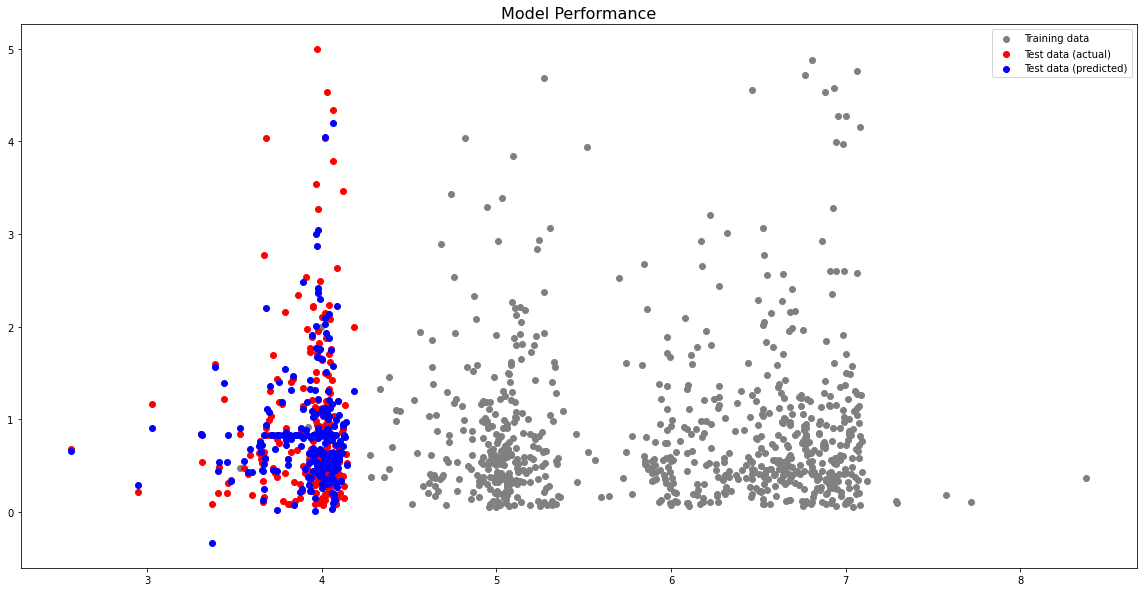

In [34]:
X = np.empty(len(X_train))
for i in range(len(X_train)):
    X[i] = np.log(np.sum(X_train[i]))
    
X2 = np.empty(len(X_test))
for i in range(len(X_test)):
    X2[i] = np.log(np.sum(X_test[i]))

fig, ax = plt.subplots()
ax.scatter(X, y_train, color='gray', label='Training data')
ax.scatter(X2, y_test, color='red', label='Test data (actual)')
ax.scatter(X2, model.predict(X_test), color='blue', label='Test data (predicted)')
ax.legend()
ax.set_title("Model Performance", fontsize=16)
plt.show()
fig.savefig("model_perfomance", dpi=300)

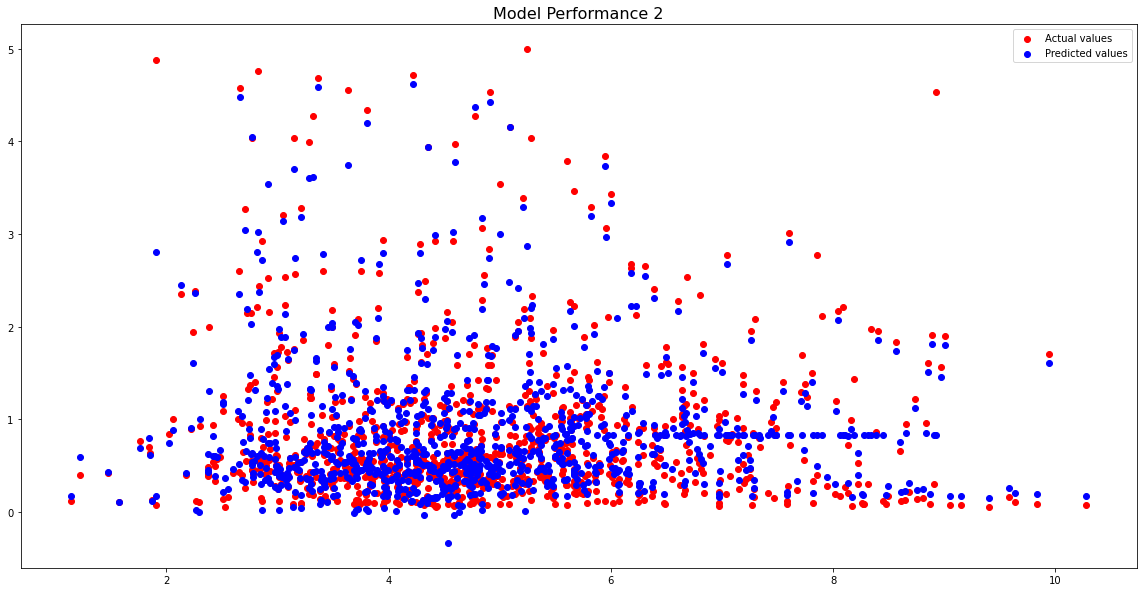

In [33]:
X = np.empty(len(spectra))
for i in range(len(spectra)):
    X[i] = np.log(np.sum(spectra.loc[i]))

fig, ax = plt.subplots()
ax.scatter(X, ages, color='red', label='Actual values')
plt.scatter(X, model.predict(spectra), color='blue', label='Predicted values')
ax.legend()
ax.set_title("Model Performance 2", fontsize=16)
fig.savefig("model_perfomance2", dpi=300)